In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self. x = x
        self.y = y
        out = x * y

        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [6]:
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


In [7]:
class AddLayer:
    def __init__(self):
        pass 

    def forward(self, x, y):
        out = x + y 
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [8]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [9]:
class Relu:
    def __init__(self):
        self,mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out
    
    def backward(self, dout):
        dout[self.mask] = 0 
        dx = dout
        return dx
    

In [11]:
import numpy as np

In [12]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [13]:
mask = (x <= 0)
mask

array([[False,  True],
       [ True, False]])

In [14]:
x[mask] = 0
x

array([[1., 0.],
       [0., 3.]])

In [15]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

In [16]:
X_dot_w = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])
X_dot_w

array([[ 0,  0,  0],
       [10, 10, 10]])

In [17]:
X_dot_w + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [18]:
dY = np.array([[1,2,3], [4,5,6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [20]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dw = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)

        return dx



In [21]:
def softmax(a):
    #overflow 문제를 고려한 소프트맥스 함수 구현
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)

    y = exp_a / sum_exp_a

    return y

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [23]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx
    

In [2]:
import sys, os
sys.path.append('/Users/jenahii/DL study/.')
import numpy as np
from deep_learning_from_scratch_master.common.layers import *
from deep_learning_from_scratch_master.common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)

            return x
        
    def loss(self, x, t):
            y = self.predict(x)
            return self.lastLayer.forward(y, t)
        
    def accuracy(self, x, t):
            y = self.predict(x)
            y = np.argmax(y, axis=1)
            if t.ndim != 1 : t = np.argmax(t, axis=1)

            accuracy = np.sum(y==t) / float(x.shape[0])

            return accuracy
        
    def numerical_gradient(self, x, t):
            loss_W = lambda W: self.loss(x, t)

            grads = {}
            grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
            grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
            grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
            grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
            return grads
        
    def gradient(self, x, t):
            self.loss(x, t)

            dout = 1
            dout = self.lastLayer.backward(dout)

            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)

            
            grads = {}
            grads['W1'] = self.layers['Affine1'].dW
            grads['b1'] = self.layers['Affine1'].db
            grads['W2'] = self.layers['Affine2'].dW
            grads['b2'] = self.layers['Affine2'].db

            return grads

In [39]:
from deep_learning_from_scratch_master.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size = 784, hidden_size= 50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ':' +str(diff))

W1:4.24391447363218e-10
b1:2.42795004113082e-09
W2:6.688036289626839e-09
b2:1.4053366493987917e-07


In [40]:
import sys, os
sys.path.append('/User/jenahii/DL study')
import numpy as np
from deep_learning_from_scratch_master.dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10755 0.1073
0.9058 0.9089
0.9258333333333333 0.9289
0.9352 0.9353
0.9430333333333333 0.9413
0.9519666666666666 0.9481
0.95675 0.9536
0.9611833333333333 0.9599
0.9629166666666666 0.9575
0.96695 0.9616
0.96845 0.9618
0.9727 0.965
0.9740666666666666 0.9671
0.97395 0.967
0.97795 0.969
0.9781666666666666 0.9692
0.9791666666666666 0.9693


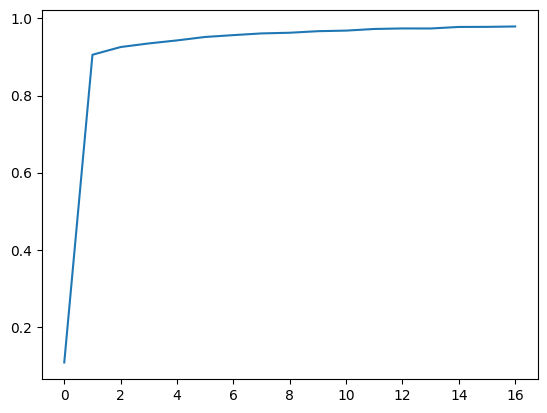

In [41]:
import matplotlib.pyplot as plt

plt.plot(train_acc_list)

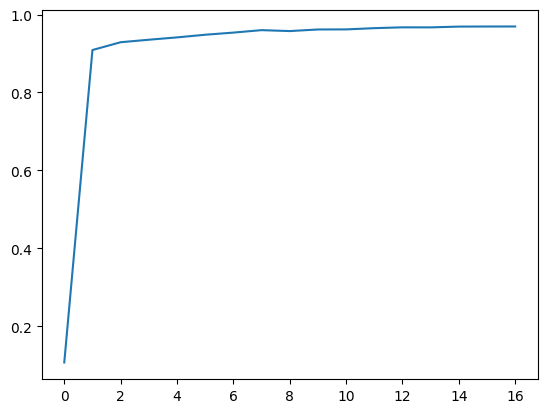

In [42]:
plt.plot(test_acc_list)

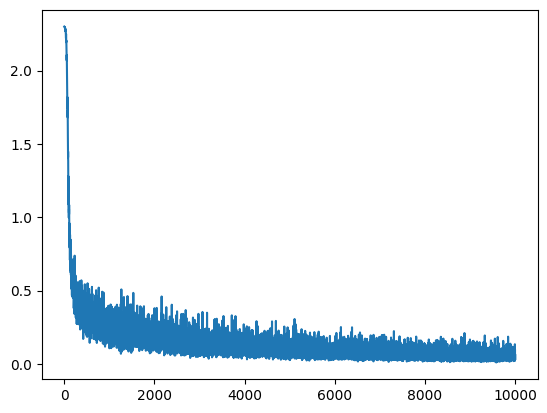

In [43]:
plt.plot(train_loss_list)